# Assignment 5.- Artificial Neural Network: feedforward.



Team:
- Alessandra Nayeli Arenas Escalante — 1994279 — N2  
- Andrea Victoria Carrizosa Bernal   — 2049922 — N2  
- Diego Iván Sánchez Vargas          — 2132200 — N2
- Perla Rubí Rodriguez Trejo         — 1997169 — N2

Class: AI  
Professor: Daniel Isaías López Páez  
Date: 31/10/2025

## Introduction

Artificial Neural Networks are computational models inspired by the structure and functioning of the human brain. They are designed to process information in a way that mimics how biological neurons transmit and respond to signals. A neural network is made up of layers of interconnected “nodes” or “neurons” that work together to analyze data, recognize patterns, and make predictions or decisions.

Unlike traditional computer programs, which follow explicit sets of instructions, neural networks have the ability to learn from experience. They do this through a process called training, where the system adjusts the strength of the connections between neurons based on examples and feedback. Over time, this allows the network to identify complex relationships within data, even when those relationships are not immediately obvious.

Artificial neural networks have become a central element in modern artificial intelligence because of their versatility and effectiveness. They are used in a wide range of applications, such as image and speech recognition, natural language processing, medical diagnosis, and autonomous systems. Their ability to handle large amounts of information and adapt to new data has made them essential tools for solving problems that were once too difficult for traditional computing approaches.

## 1) Load libraries

In this first part of the notebook, the main libraries necessary for working with data, visualization, and neural networks are imported. NumPy allows efficient handling of large numerical arrays, which is essential since images are stored as arrays of pixel values. Matplotlib is used to create visualizations that help interpret and analyze the data, such as displaying sample images or plotting results from the model. TensorFlow is the core library used to design, train, and evaluate the artificial neural network, providing high-level tools that make the process of building models more accessible. Finally, Pandas is used to organize and manage data in tabular form, allowing for an easier understanding of how each label corresponds to its class. Printing the version of TensorFlow at the end ensures that the correct environment is being used, since version differences can sometimes affect how certain functions behave.

In [1]:
# Main libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

print(tf.__version__)


2.19.0


## 2) Load data

In this section, the MNIST dataset is loaded directly from the TensorFlow library. The dataset provides a way to train and test models on handwritten digits. It contains a total of 70,000 grayscale images of numbers from 0 to 9, each with a resolution of 28 by 28 pixels. The dataset is automatically divided into two parts: the training set, which is used to teach the model how to recognize digits, and the test set, which is used to evaluate how well the model performs on new, unseen data. Additionally, a small DataFrame is created with Pandas to associate each numeric label from 0 to 9 with its corresponding class name, making the dataset easier to interpret later during visualization or prediction analysis.

In [2]:
# Cargar MNIST desde Keras

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

class_names = ['number 0', 'number 1', 'number 2', 'number 3', 'number 4', 'number 5', 'number 6', 'number 7', 'number 8', 'number 9']

# Crear DataFrame con etiquetas y nombres
df = pd.DataFrame({
    'label': range(10),
    'name class': class_names
})

# Mostrar tabla
print(df)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
   label name class
0      0   number 0
1      1   number 1
2      2   number 2
3      3   number 3
4      4   number 4
5      5   number 5
6      6   number 6
7      7   number 7
8      8   number 8
9      9   number 9


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

After loading the data, several checks are performed to better understand its structure. By printing the shape of the image arrays, we can see the total number of samples and confirm that each image has the expected size of 28 by 28 pixels. The commands that show the length of the labels verify that there is one label for every image in both the training and testing sets. Displaying the actual labels also allows us to confirm that the dataset contains the full range of digits, from 0 to 9.

## 3) Data preprocessing

Before training the neural network, it is important to visualize a few examples from the dataset to understand how the data looks. In this part, one of the images from the training set is displayed using Matplotlib. The image corresponds to a handwritten digit, and the color bar next to it shows the range of pixel intensity values. This visualization confirms that the data consists of grayscale images and that each pixel’s brightness represents the intensity of the handwriting. Observing the image at this stage helps us ensure that the dataset has been loaded properly and that the samples are suitable for training.

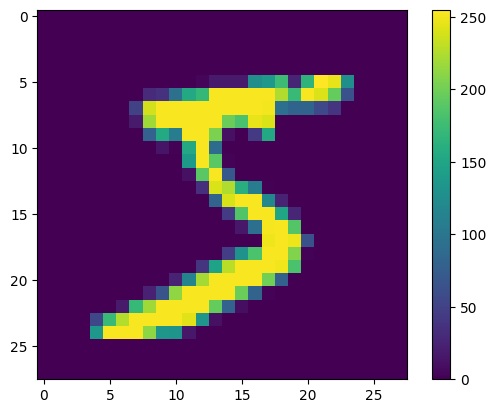

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Next, the images are normalized by dividing all pixel values by 255.0. Originally, each pixel has an intensity value between 0 and 255, where 0 represents black and 255 represents white. By converting these values to a range between 0 and 1, the training process becomes faster and more stable.

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Finally, a grid displaying 25 images from the training set is generated to  confirm that the preprocessing was successful. Each image shows a handwritten digit accompanied by its label below it. This step provides an overview of the different types of handwriting styles included in the dataset and allows us to verify that the normalization did not distort the images.

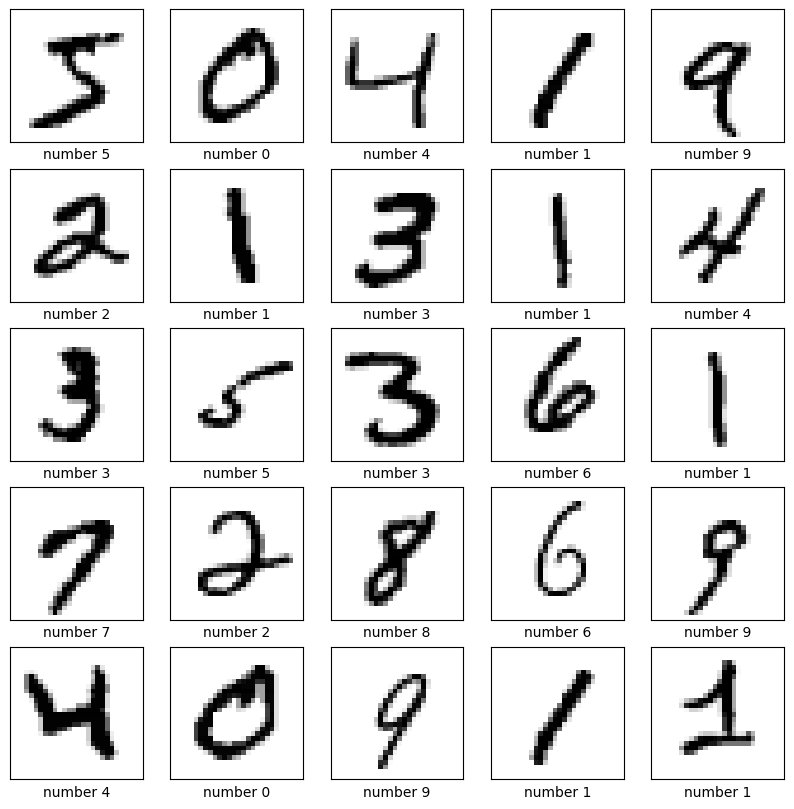

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4) Model selection and training

In this section, a neural network is constructed and trained to recognize handwritten digits from the MNIST dataset. First, a sequential model with dense layers is defined: one input layer, 784 neurons, one hidden layer with ReLU activation, and one output layer with 10 neurons, one per digit.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Next, configure the Adam optimizer, which adaptively adjusts weights to accelerate training convergence. The loss function used is SparseCategoricalCrossentropy, which measures the error between the true labels and those predicted by the model, making it suitable for multi-class classification problems. In addition, accuracy is used as the main metric to evaluate model performance during the training and validation process.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

The model is trained for 20 epochs and evaluated with unseen data to demonstrate its generalization ability. A Softmax layer is then added to obtain probabilities, and predictions are made on the test set.

In [14]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8794 - loss: 0.4259
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9636 - loss: 0.1242
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9766 - loss: 0.0754
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9842 - loss: 0.0548
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9875 - loss: 0.0419
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9905 - loss: 0.0324
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9917 - loss: 0.0255
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9942 - loss: 0.0205
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9949 - loss: 0.0169
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9964 - loss: 0.0125
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9965 - loss: 0.0112
Epoch 12/20
1875/1875 ━━━━━━━

Once training is complete, the model's performance is evaluated using the test set, which contains images that the model has not seen before.

In [15]:
#evaluate presicion
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9779 - loss: 0.1066

Test accuracy: 0.9779000282287598


In [16]:
#Predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
#first prediction
predictions[0]

array([3.8785486e-15, 5.5536636e-16, 2.2283286e-12, 1.3137441e-10,
       1.4460852e-19, 2.7227829e-17, 1.4011295e-18, 9.9999994e-01,
       4.1851909e-16, 6.7979580e-11], dtype=float32)

#5) Model testing

This section analyzes the results of the trained model using different visualizations. First, predictions are obtained and compared with the actual labels to verify the accuracy of the model.

In [18]:
np.argmax(predictions[0])

np.int64(7)

In [19]:
test_labels[0]

np.uint8(7)

Next, the images from the test set are displayed alongside a bar chart indicating the probability assigned to each class: green represents correct answers and red represents errors. This allows for a visual assessment of the model's confidence level and helps identify which digits it tends to get wrong.

In [20]:
#predictions of 10 classes
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

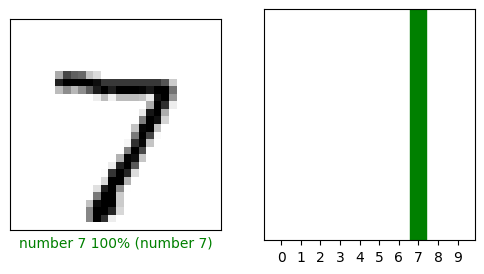

In [21]:
#image 0
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

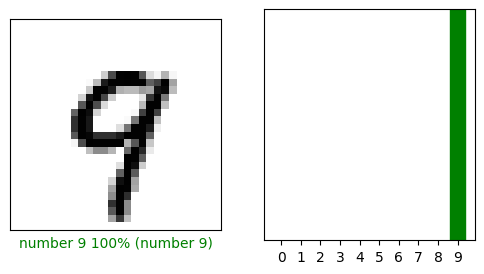

In [22]:
#image 12
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Finally, a single image from the test set is taken to observe the entire prediction process, from preprocessing to the final estimated class.

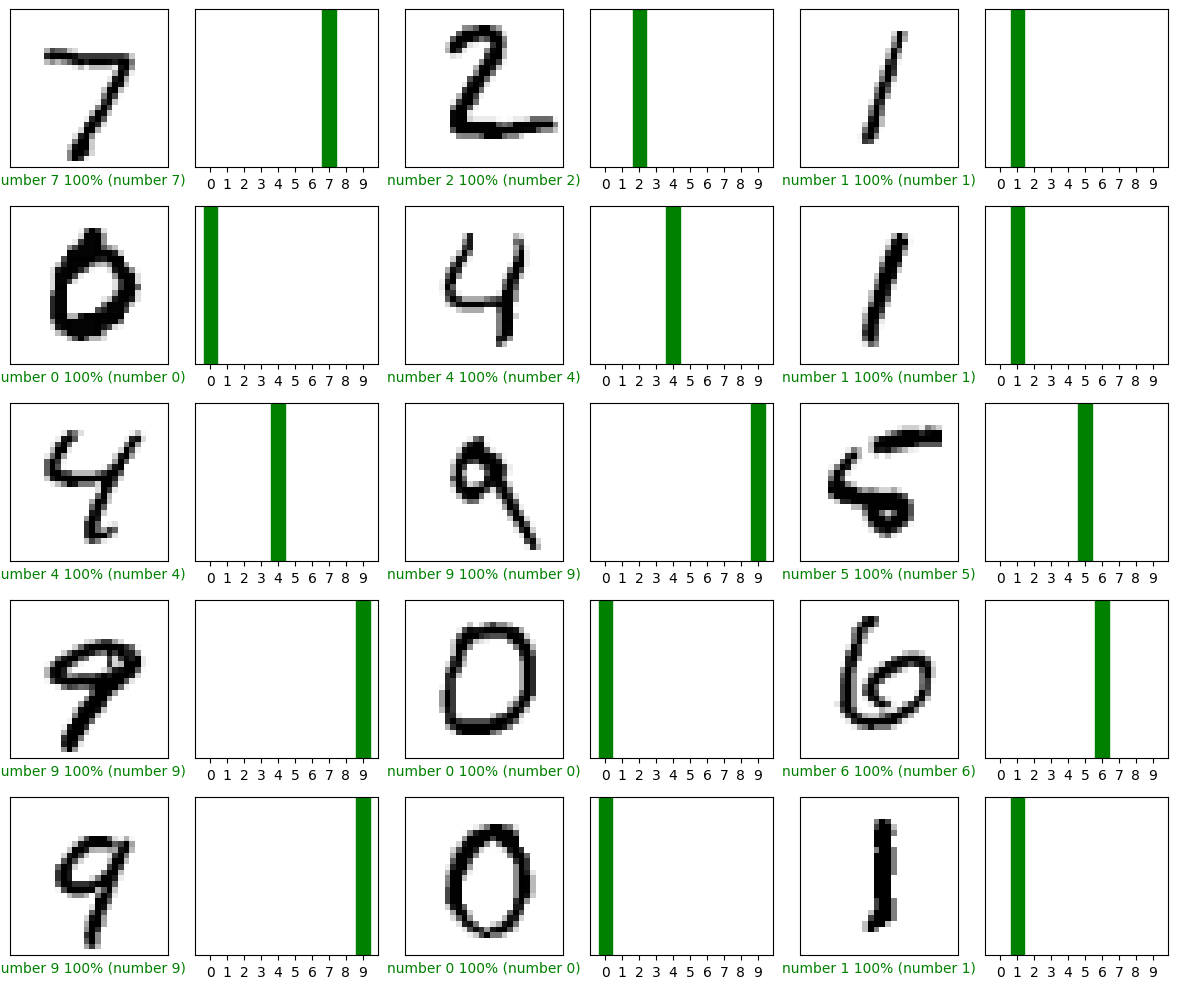

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In the following sections, a test image was taken to verify its shape and pixels, then an extra dimension was added to use the predict() method and generate the probability prediction for that particular image.

In [24]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
#correct label for this image
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[1.0556067e-14 8.9574861e-11 9.9999988e-01 8.7183510e-11 1.6170782e-23
  7.6994883e-13 1.1689105e-12 3.0829532e-24 1.2433838e-07 2.5722115e-24]]


The probabilities of each class for the specific image are now displayed, and the class with the highest probability is returned.

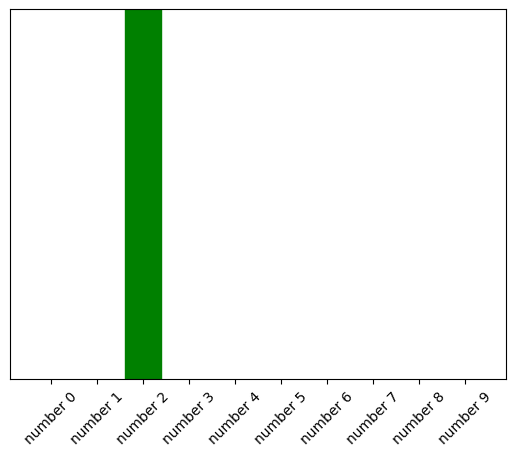

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

np.int64(2)

## Results

The feedforward neural network model showed rapid and stable convergence during the 20 training epochs, achieving very high accuracy in both the training and test sets. The visualizations generated confirmed that most of the predictions were correct: in the first images analyzed, the probability bars were located at the corresponding number (for example, at digits 7 and 9), displaying a green color indicating correctness. Likewise, in the set of samples shown, the bars consistently matched the actual class, demonstrating the model's accurate performance. The probability graphs also showed that the model not only gets it right in most cases, but also assigns high levels of confidence to its correct predictions, confirming its reliability and generalization ability.


## General conclusion

The development of the artificial neural network allowed for a practical understanding of how these models process and classify visual information. By training the network with the MNIST dataset, it was possible to observe how the model gradually improved its performance through multiple training cycles, learning to correctly recognize most handwritten digits. The experiment confirmed that even a relatively simple neural network architecture can achieve high accuracy when the data is properly prepared and the model parameters are well adjusted.
The preprocessing stage, which included normalizing pixel values and inspecting the images, proved essential to ensure consistent inputs and stable training. Likewise, the use of the ReLU activation function, the Adam optimizer, and a cross-entropy loss function contributed to efficient learning and reliable convergence. The evaluation phase showed that the trained model was able to generalize effectively, maintaining strong performance with the test data and correctly identifying digits it had not encountered before.
The assignment demonstrated the principles of neural network operation, from data preparation to model evaluation. It showed how these systems can learn from examples, adapt to different patterns, and make accurate predictions when properly configured.


## References



1.   Chollet, F. (2018). Deep Learning with Python (2nd ed.). Manning Publications.
2.   McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O’Reilly Media.


1.   Matthes, E. (2023). Python crash course. No starch press. https://www.w3schools.com/python/default.asp
2.   Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc." https://www.tensorflow.org/tutorials/keras/classification



